Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:21<00:00, 42.5MB/s]
100% 812M/812M [00:21<00:00, 40.0MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.1755.jpg', 'cat.2150.jpg', 'dog.10119.jpg', 'dog.5534.jpg', 'dog.20.jpg', 'dog.12016.jpg', 'cat.4321.jpg', 'cat.5892.jpg', 'dog.4377.jpg', 'dog.2472.jpg', 'dog.12237.jpg', 'dog.10482.jpg', 'cat.10197.jpg', 'cat.8921.jpg', 'cat.11629.jpg', 'dog.3154.jpg', 'cat.9611.jpg', 'dog.7854.jpg', 'cat.5384.jpg', 'cat.12358.jpg', 'dog.868.jpg', 'cat.5359.jpg', 'cat.5945.jpg', 'cat.5095.jpg', 'cat.7490.jpg', 'cat.7820.jpg', 'dog.5747.jpg', 'cat.10142.jpg', 'dog.6339.jpg', 'dog.3106.jpg', 'dog.8780.jpg', 'cat.379.jpg', 'dog.1931.jpg', 'cat.10892.jpg', 'cat.4906.jpg', 'dog.4560.jpg', 'dog.1483.jpg', 'dog.12193.jpg', 'cat.10384.jpg', 'cat.1904.jpg', 'cat.3847.jpg', 'dog.4755.jpg', 'dog.5548.jpg', 'cat.2248.jpg', 'dog.3664.jpg', 'cat.958.jpg', 'dog.10989.jpg', 'dog.6144.jpg', 'dog.1308.jpg', 'cat.10708.jpg', 'cat.7404.jpg', 'dog.7425.jpg', 'cat.6678.jpg', 'cat.5468.jpg', 'dog.7001.jpg', 'dog.10718.jpg', 'dog.11970.jpg', 'dog.7120.jpg', 'cat.6198.jpg', 'dog.1081.jpg', 'cat.4767.jpg', 'dog.5395.jpg

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

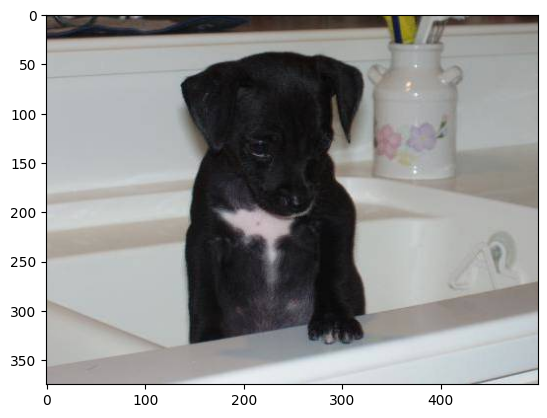

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

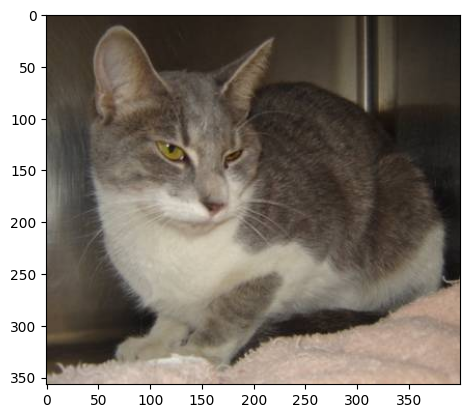

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
cat
dog
dog
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

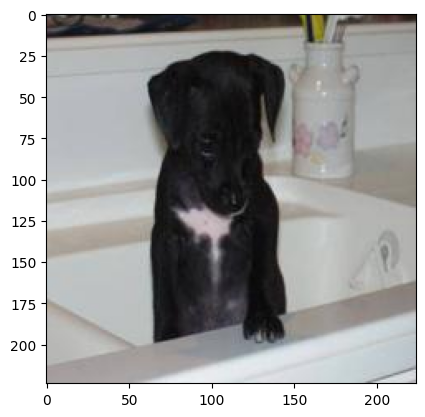

In [19]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

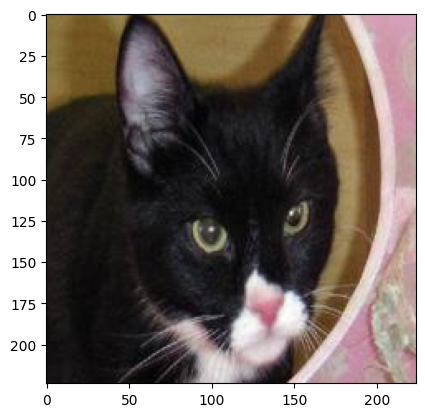

In [22]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.10001.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [23]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.1755.jpg', 'cat.2150.jpg', 'dog.10119.jpg', 'dog.5534.jpg', 'dog.20.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 1]
2000


In [26]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1016  984]


Converting all the resized images to numpy arrays

In [27]:
import cv2
import glob

In [28]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [29]:
print(dog_cat_images)

[[[[182 159 133]
   [182 159 133]
   [187 164 138]
   ...
   [198 173 147]
   [201 176 150]
   [203 178 152]]

  [[192 167 141]
   [188 165 139]
   [191 166 140]
   ...
   [190 165 139]
   [195 170 144]
   [199 174 148]]

  [[196 169 142]
   [191 167 139]
   [191 164 137]
   ...
   [192 167 141]
   [198 173 147]
   [203 178 152]]

  ...

  [[144 148 166]
   [141 148 165]
   [141 148 167]
   ...
   [181 139  97]
   [182 140 103]
   [189 147 110]]

  [[109 116 133]
   [110 118 135]
   [112 119 138]
   ...
   [180 138  96]
   [181 139 102]
   [188 146 109]]

  [[101 109 126]
   [105 113 130]
   [106 115 135]
   ...
   [183 141  99]
   [187 145 108]
   [195 153 116]]]


 [[[ 61  33   3]
   [ 62  34   4]
   [ 61  34   7]
   ...
   [  5   9  27]
   [ 12  18  41]
   [ 13  20  45]]

  [[ 61  35  11]
   [ 62  36  12]
   [ 61  35  11]
   ...
   [  5   9  27]
   [ 12  18  41]
   [ 13  20  45]]

  [[ 60  37  22]
   [ 60  37  22]
   [ 60  37  22]
   ...
   [  6  10  28]
   [ 11  19  42]
   [ 11  21

In [30]:
type(dog_cat_images)

numpy.ndarray

In [31]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [32]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [35]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
print(X_train_scaled)

[[[[0.28627451 0.45098039 0.50196078]
   [0.29803922 0.4627451  0.51372549]
   [0.3254902  0.47843137 0.5372549 ]
   ...
   [0.22745098 0.38039216 0.50588235]
   [0.22745098 0.38039216 0.50588235]
   [0.22745098 0.38039216 0.50588235]]

  [[0.31764706 0.48235294 0.53333333]
   [0.32156863 0.48627451 0.5372549 ]
   [0.3372549  0.49019608 0.54901961]
   ...
   [0.22352941 0.37647059 0.50196078]
   [0.22745098 0.38039216 0.50588235]
   [0.23529412 0.38823529 0.51372549]]

  [[0.3254902  0.48627451 0.54509804]
   [0.32156863 0.48235294 0.54117647]
   [0.3254902  0.47843137 0.5372549 ]
   ...
   [0.22745098 0.38039216 0.50588235]
   [0.23529412 0.38823529 0.51372549]
   [0.24705882 0.4        0.5254902 ]]

  ...

  [[0.94117647 0.98823529 1.        ]
   [0.94117647 0.98823529 1.        ]
   [0.94117647 0.98823529 1.        ]
   ...
   [0.60784314 0.69019608 0.77254902]
   [0.58039216 0.6627451  0.74901961]
   [0.54901961 0.63137255 0.71764706]]

  [[0.94117647 0.98823529 1.        ]
   [0.9

**Building the Neural Network**

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [40]:
 pip install tf_keras

In [42]:
import tf_keras

In [44]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [46]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.2056 - acc: 0.9181
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0703 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 69s 1s/step - loss: 0.0485 - acc: 0.9819
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0398 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 71s 1s/step - loss: 0.0322 - acc: 0.9919


In [47]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 26s 2s/step - loss: 0.0445 - acc: 0.9900
Test Loss = 0.044463612139225006
Test Accuracy = 0.9900000095367432


**Predictive System**

Path of the image to be predicted: /content/image resized/cat.10019.jpg


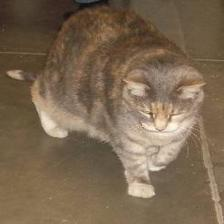

1/1 [==============================] - 1s 641ms/step
[[ 3.8107638 -2.2610493]]
0
The image represents a Cat


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/23.jpg


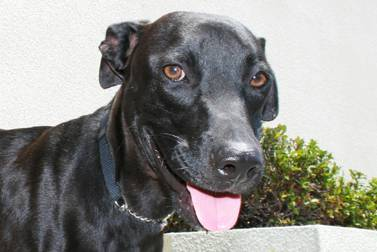

1/1 [==============================] - 0s 55ms/step
[[-2.327694   2.4366107]]
1
The image represents a Dog


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')